In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import requests
#from bs4 import BeautifulSoup #html 문서를 피싱할 때 사용하는 AJAX 방식으로 넘어오는 데이터를 크롤링 할 때 사용하지 않는다
import json #json 형태의 문자열을 파이썬에서 처리하기 위해 loads() 메소드로 딕셔너리나 리스트 형태로 변환한다.

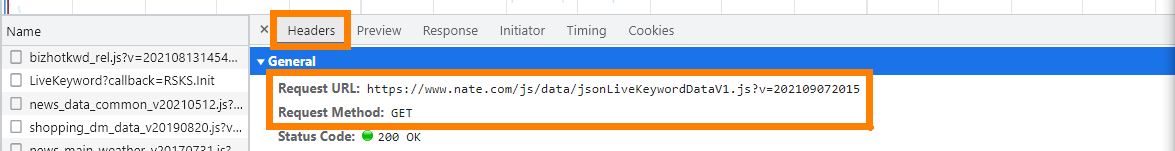

In [2]:
from IPython.display import Image
Image('./NateAjax2.png')

In [3]:
#실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어 있지 않고 ajax를 이용해서  받아오는 방식이 사용된다
#Request Method가 GET 방식이므로 requests 모듈에 get()메소드를 사용해서 실시간 검색어를 받아온다
targetSite ='https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=202109081725'
request = requests.get(targetSite)
print(request)
#파이썬은 한글 encoding이 유니코드(UTF-8)로 되어있기 떄문에 encoding 방식을 'euc-kr'을 사용하는 사이트를 크로링 할 때
#한글이 깨져 보이는 현상이 발생될 수 있다
#한글 encoding 문제로 한글이 깨져서 보이면 아래와 같이 encoding 방식을 변경하면 된다.
request.encoding = 'euc-kr'

<Response [200]>


In [4]:
issues = request.text
print(type(issues))
print(issues)

<class 'str'>
[["1",  "정애연",  "s",  "0",  "정애연"], ["2",  "국민지원금 신청",  "s",  "0",  "국민지원금 신청"], ["3",  "서울 평균 서울은",  "s",  "0",  "서울 평균 서울은"], ["4",  "이다인",  "s",  "0",  "이다인"], ["5",  "위드 코로나는 마스크와",  "+",  "1",  "위드 코로나는 마스크와"], ["6",  "투약 휘성 구형",  "+",  "1",  "투약 휘성 구형"], ["7",  "이낙연",  "-",  "2",  "이낙연"], ["8",  "곳간 비어 간다 홍남기",  "s",  "0",  "곳간 비어 간다 홍남기"], ["9",  "국방부 청해부대 집단감염",  "s",  "0",  "국방부 청해부대 집단감염"], ["10",  "정우성 아프가니스탄 기부",  "s",  "0",  "정우성 아프가니스탄 기부"]]


In [5]:
#json 문자열 형태로 얻어온 실시간 이슈 키워드는 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있는 데이터
#타입 (리스트나 딕셔너리)로 변화해서 사용한다.
#loads() 메소드는 json 타입의 문자열이 {}를 포함하는 형태면 딕셔너리로 []만 포함하는 형태면 리스트로 자동 변환한다
ranks = json.loads(issues)
print(type(ranks)) #converted to listed format
print(ranks)

<class 'list'>
[['1', '정애연', 's', '0', '정애연'], ['2', '국민지원금 신청', 's', '0', '국민지원금 신청'], ['3', '서울 평균 서울은', 's', '0', '서울 평균 서울은'], ['4', '이다인', 's', '0', '이다인'], ['5', '위드 코로나는 마스크와', '+', '1', '위드 코로나는 마스크와'], ['6', '투약 휘성 구형', '+', '1', '투약 휘성 구형'], ['7', '이낙연', '-', '2', '이낙연'], ['8', '곳간 비어 간다 홍남기', 's', '0', '곳간 비어 간다 홍남기'], ['9', '국방부 청해부대 집단감염', 's', '0', '국방부 청해부대 집단감염'], ['10', '정우성 아프가니스탄 기부', 's', '0', '정우성 아프가니스탄 기부']]


In [6]:
#requests 모듈의 json() 메소드를 실행하면 json 문자열 형태로 얻어온 실시간 이슈 키워드를 파이썬에서 처리하 수 있는 
#데이터 타입으로 변환할 수 있다.
ranks = request.json()
print(type(ranks)) #converted to listed format
print(ranks)

<class 'list'>
[['1', '정애연', 's', '0', '정애연'], ['2', '국민지원금 신청', 's', '0', '국민지원금 신청'], ['3', '서울 평균 서울은', 's', '0', '서울 평균 서울은'], ['4', '이다인', 's', '0', '이다인'], ['5', '위드 코로나는 마스크와', '+', '1', '위드 코로나는 마스크와'], ['6', '투약 휘성 구형', '+', '1', '투약 휘성 구형'], ['7', '이낙연', '-', '2', '이낙연'], ['8', '곳간 비어 간다 홍남기', 's', '0', '곳간 비어 간다 홍남기'], ['9', '국방부 청해부대 집단감염', 's', '0', '국방부 청해부대 집단감염'], ['10', '정우성 아프가니스탄 기부', 's', '0', '정우성 아프가니스탄 기부']]


In [7]:
for rank in ranks:
    print(rank)

['1', '정애연', 's', '0', '정애연']
['2', '국민지원금 신청', 's', '0', '국민지원금 신청']
['3', '서울 평균 서울은', 's', '0', '서울 평균 서울은']
['4', '이다인', 's', '0', '이다인']
['5', '위드 코로나는 마스크와', '+', '1', '위드 코로나는 마스크와']
['6', '투약 휘성 구형', '+', '1', '투약 휘성 구형']
['7', '이낙연', '-', '2', '이낙연']
['8', '곳간 비어 간다 홍남기', 's', '0', '곳간 비어 간다 홍남기']
['9', '국방부 청해부대 집단감염', 's', '0', '국방부 청해부대 집단감염']
['10', '정우성 아프가니스탄 기부', 's', '0', '정우성 아프가니스탄 기부']


In [14]:
for rank in ranks:
    print('{0:>2s}위: {1}'.format(rank[0], rank[1]), end ='')
    if rank[2] == '+':
        print('[{}{}]'.format('↑', rank[3]))
    elif rank[2] == '-':
        print('[{}{}]'.format('↓', rank[3]))
    elif rank[2] == 's':
        pri\nt('[-]')
    else:
        print('[new]')

 1위: 정애연[-]
 2위: 국민지원금 신청[-]
 3위: 서울 평균 서울은[-]
 4위: 이다인[-]
 5위: 위드 코로나는 마스크와[↑1]
 6위: 투약 휘성 구형[↑1]
 7위: 이낙연[↓2]
 8위: 곳간 비어 간다 홍남기[-]
 9위: 국방부 청해부대 집단감염[-]
10위: 정우성 아프가니스탄 기부[-]
